In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mikemwita
Your Kaggle Key: ··········


100%|██████████| 2.54k/2.54k [00:00<00:00, 4.48MB/s]

In [3]:
import pandas as pd

df = pd.read_csv('sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Preprocessing

In [5]:
# Drop unnecessary columns
clean_df = df.drop(columns='Person ID', axis=1)

In [6]:
# Check for missing values
clean_df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
# Check data types
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [8]:
# Separate categorical and numerical columns
Categorical_Col = clean_df.select_dtypes(include=['object']).columns.tolist()
Numerical_Col = clean_df.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [9]:
# Encode categorical columns
LE = LabelEncoder()
for col in Categorical_Col:
    clean_df[col] = LE.fit_transform(clean_df[col])

# Data Visualization

<Figure size 1200x1000 with 0 Axes>

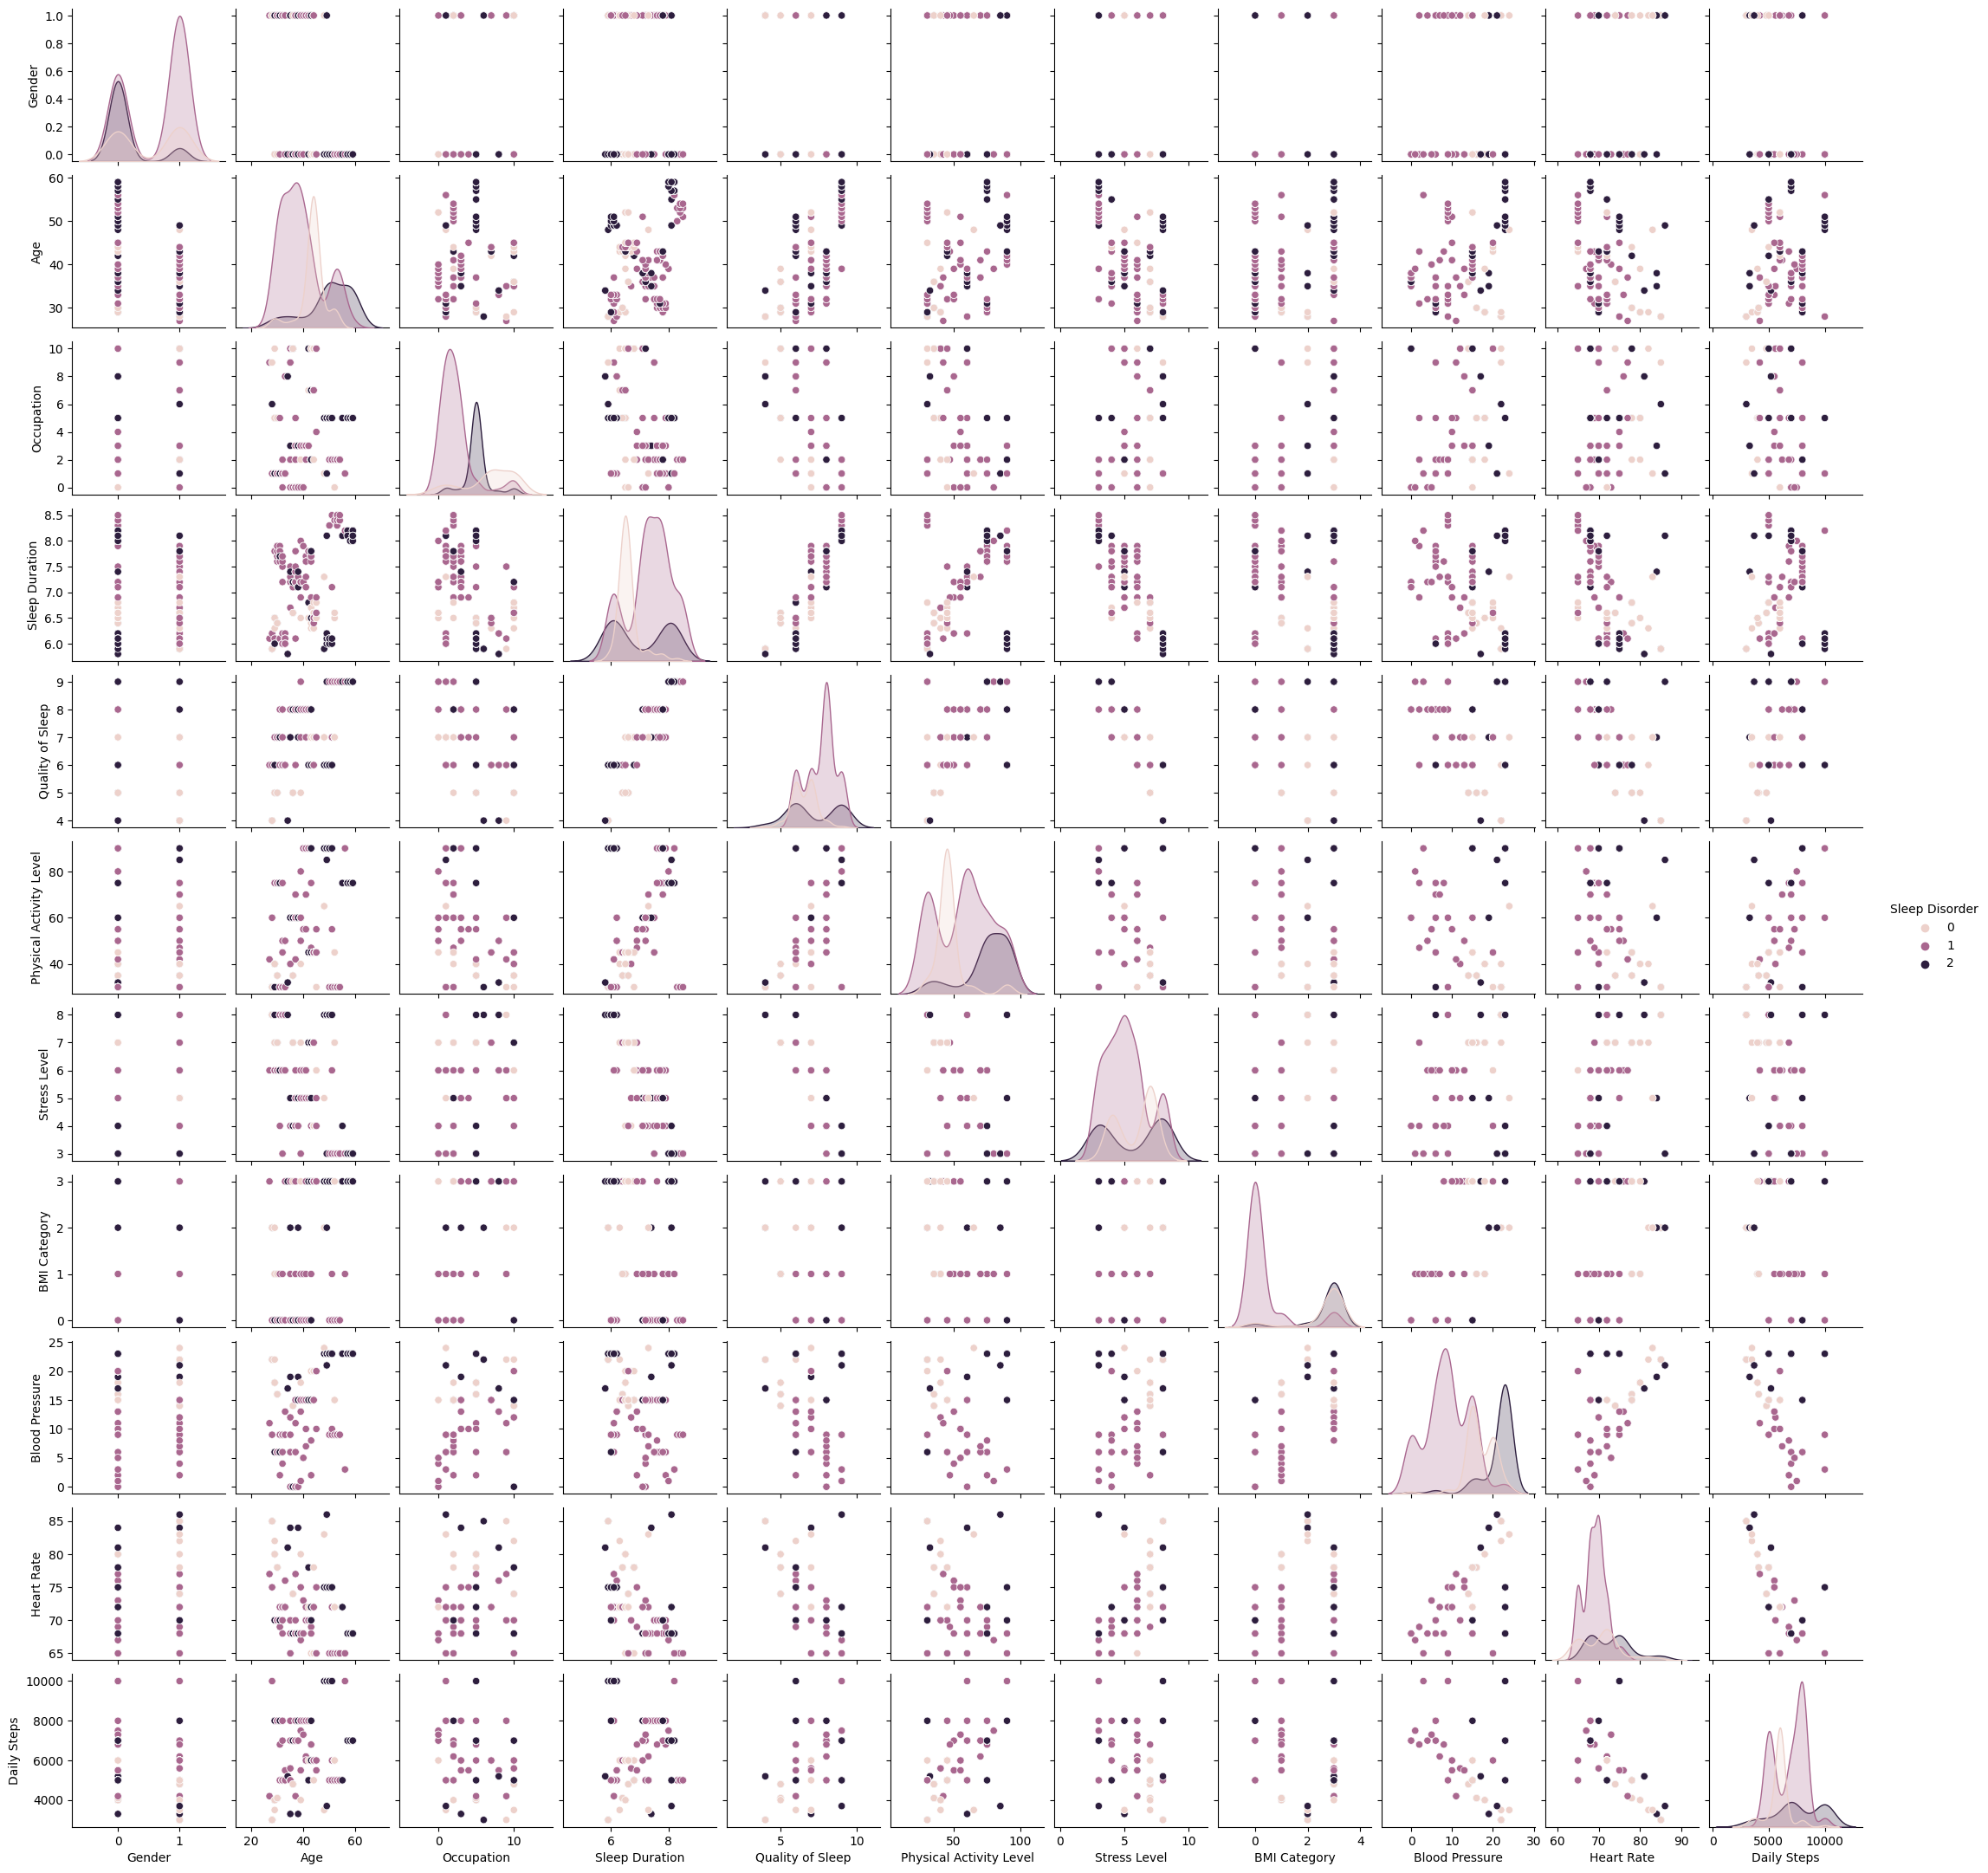

In [10]:
plt.figure(figsize=(12, 10))
sns.pairplot(clean_df, hue='Sleep Disorder', height=2)
plt.show()

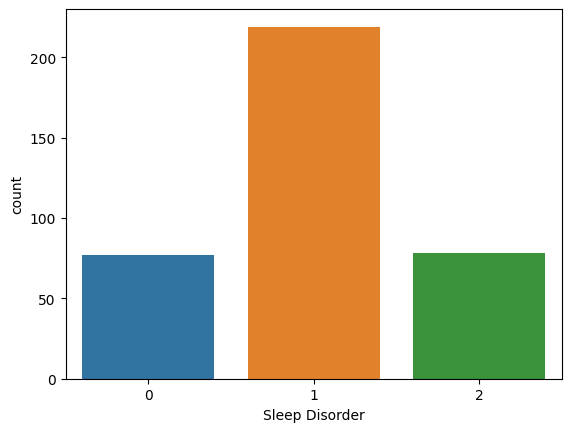

In [11]:
sns.countplot(data=clean_df, x='Sleep Disorder')
plt.show()


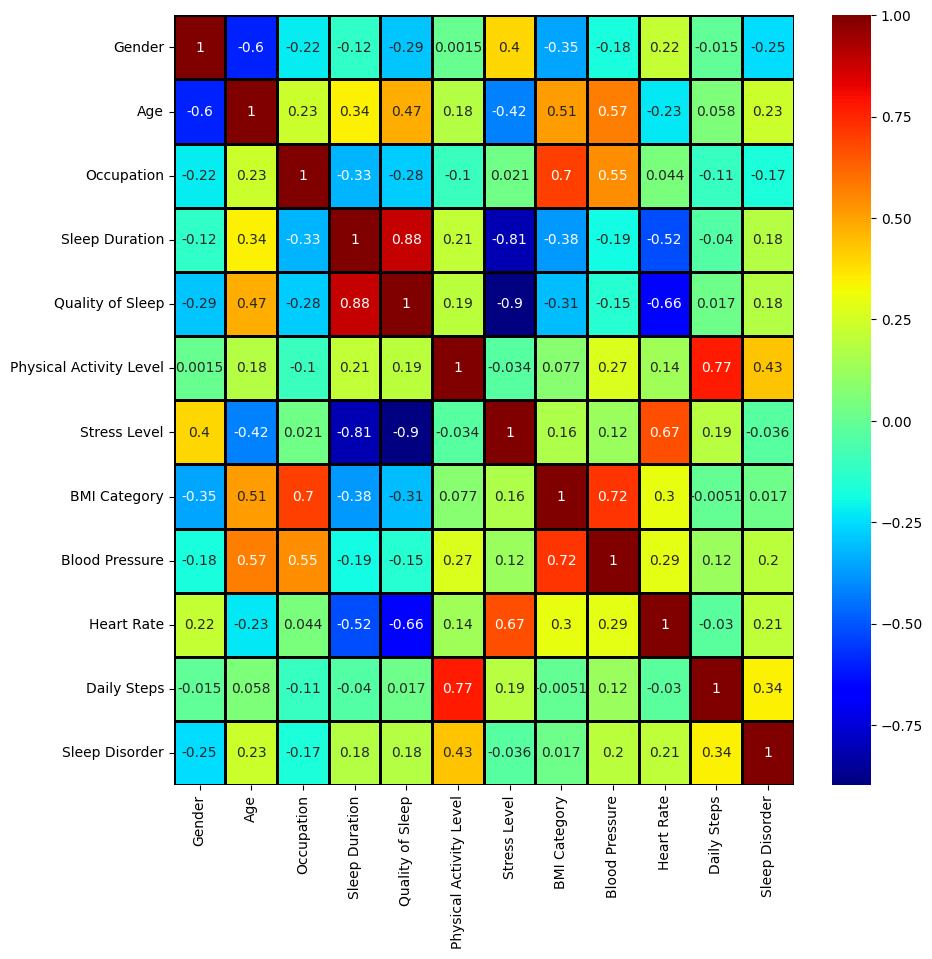

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(clean_df.corr(), cmap='jet', linewidths=1, linecolor='black', annot=True)
plt.show()

In [13]:
#  Animated bar chart using Plotly
import plotly.express as px
fig = px.bar(clean_df, x='Age', y='Daily Steps', animation_frame='Sleep Disorder', range_y=[0, 15000])
fig.update_layout(title='Animated Bar Chart of Daily Steps by Age and Sleep Disorder')
fig.show()


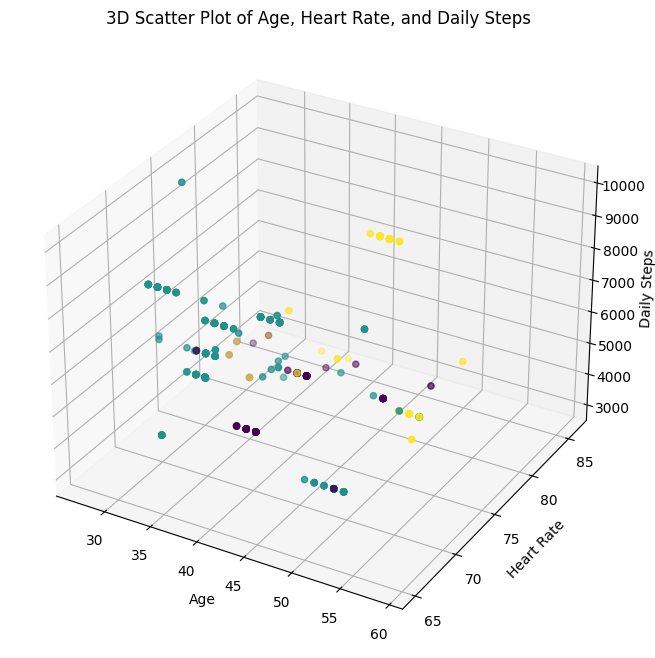

In [14]:
#  3D Scatter plot using Matplotlib
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clean_df['Age'], clean_df['Heart Rate'], clean_df['Daily Steps'], c=clean_df['Sleep Disorder'])
ax.set_xlabel('Age')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Daily Steps')
plt.title('3D Scatter Plot of Age, Heart Rate, and Daily Steps')
plt.show()


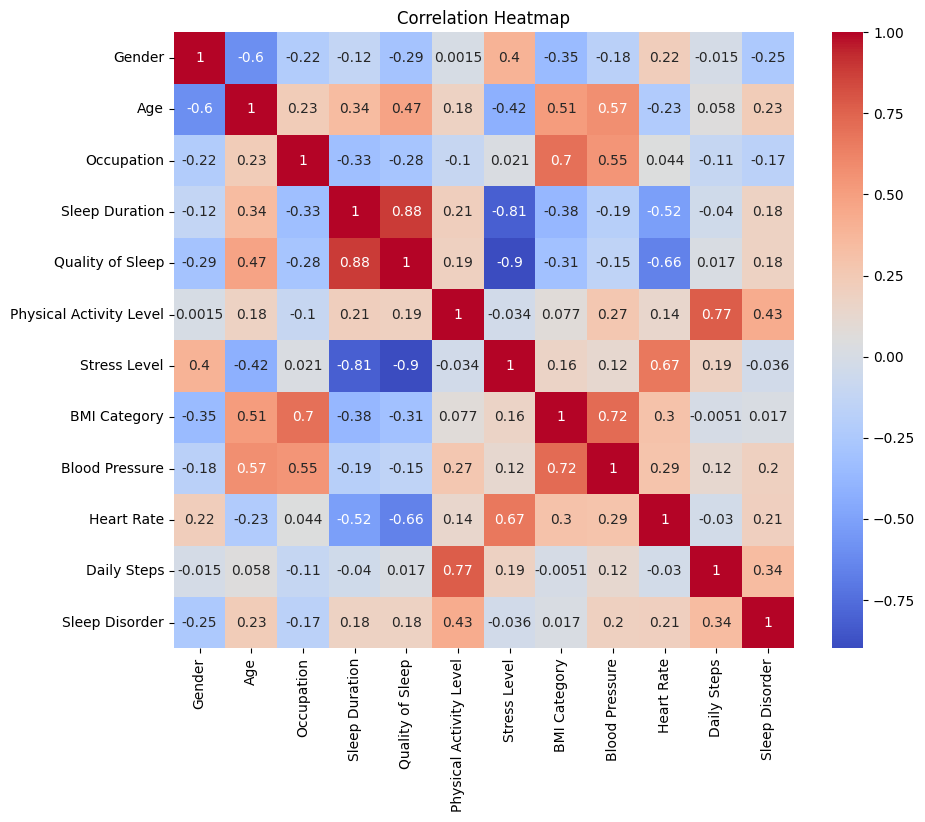

In [15]:
#  Correlation heatmap
correlation_matrix = clean_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 Train & Test Split


In [16]:
X = clean_df.iloc[:, :-1]
y = clean_df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building the Model

In [17]:
# Build the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
# Make predictions
y_pred = svm_model.predict(X_test)


# Model Evaluation

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8936170212765957


In [20]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8936170212765957

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.88      0.77        17
           1       0.96      0.95      0.95        55
           2       0.94      0.77      0.85        22

    accuracy                           0.89        94
   macro avg       0.86      0.87      0.86        94
weighted avg       0.91      0.89      0.90        94



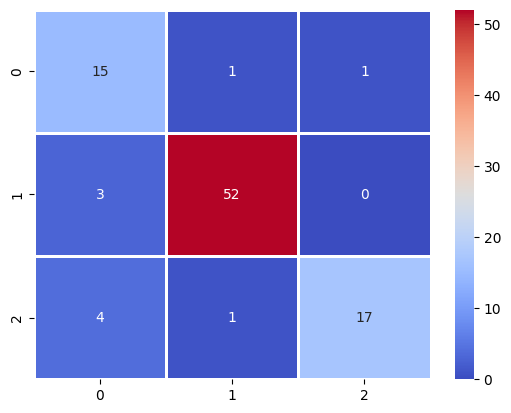

In [21]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', linecolor='white', linewidths=1, annot=True)
plt.show()

Rabdom forest classifier

In [22]:

# Train & Test Split
X = clean_df.iloc[:, :-1]
y = clean_df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [23]:

# Build the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:

# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [25]:

# Model Evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.8936170212765957


In [26]:

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.96      0.98      0.97        55
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



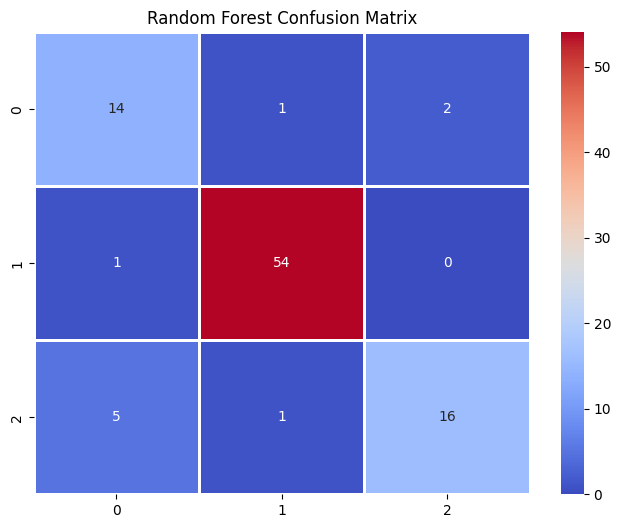

In [27]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), cmap='coolwarm', linecolor='white', linewidths=1, annot=True)
plt.title('Random Forest Confusion Matrix')
plt.show()

# xgboost

In [28]:
# Train & Test Split
X = clean_df.iloc[:, :-1]
y = clean_df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [29]:

# Build the XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [30]:

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [31]:
# Model Evaluation for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.8936170212765957


In [32]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.96      0.98      0.97        55
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



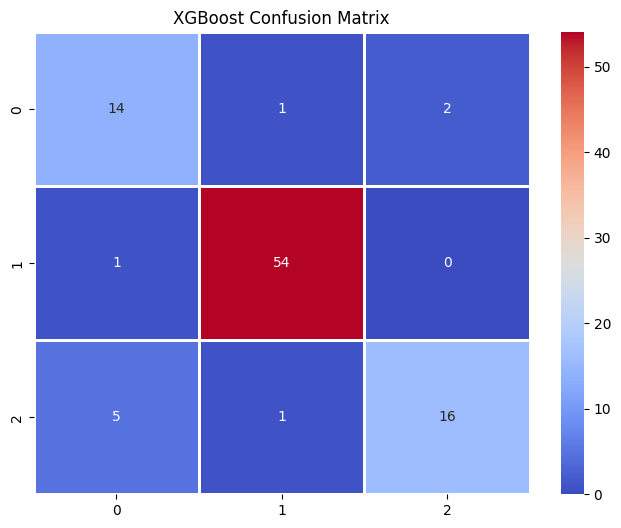

In [33]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), cmap='coolwarm', linecolor='white', linewidths=1, annot=True)
plt.title('XGBoost Confusion Matrix')
plt.show()